In [2]:
"""
Problem Statement: AI Job Salary Prediction

Background:
The AI job market is expanding rapidly, with varying salaries based on job role, industry, company size, and required skills.
Employers and job seekers need a reliable way to estimate salaries based on these factors.

Objective:
The goal of this project is to develop a machine learning model 
that predicts AI job salaries based on job-related features such as job title, industry, company size, automation risk, and skills required.

Challenges:
- AI job salaries vary significantly based on experience, location, and company policies.
- Categorical features like job title and skills must be efficiently encoded.
- Selecting the best regression model for accurate salary predictions.

Expected Outcome:
- A trained regression model that predicts AI job salaries based on input features.
- Performance evaluation of models like Linear Regression, Random Forest, and XGBoost.
- Insights into which factors influence salary variations the most.
"""

'\nProblem Statement: AI Job Salary Prediction\n\nBackground:\nThe AI job market is expanding rapidly, with varying salaries based on job role, industry, company size, and required skills.\nEmployers and job seekers need a reliable way to estimate salaries based on these factors.\n\nObjective:\nThe goal of this project is to develop a machine learning model \nthat predicts AI job salaries based on job-related features such as job title, industry, company size, automation risk, and skills required.\n\nChallenges:\n- AI job salaries vary significantly based on experience, location, and company policies.\n- Categorical features like job title and skills must be efficiently encoded.\n- Selecting the best regression model for accurate salary predictions.\n\nExpected Outcome:\n- A trained regression model that predicts AI job salaries based on input features.\n- Performance evaluation of models like Linear Regression, Random Forest, and XGBoost.\n- Insights into which factors influence salar

In [3]:
#Required Modules for this Model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#Data Collection
df = pd.read_csv("ai_job_market_insights.csv")

In [5]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.16520,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56247,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.26310,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.95376,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.92217,Yes,Decline


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [7]:
df.describe()

,Salary_USD
count,500.000000
mean,91222.390973
std,20504.291452
min,31969.526350
25%,78511.514860
50%,91998.195285
75%,103971.282075
max,155209.821600


In [8]:
df.isna().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [10]:
df.drop_duplicates(inplace=True)

C:\Users\sures\AppData\Local\Temp\ipykernel_11292\4103877193.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_title_counts.index, y=job_title_counts.values, palette="viridis")


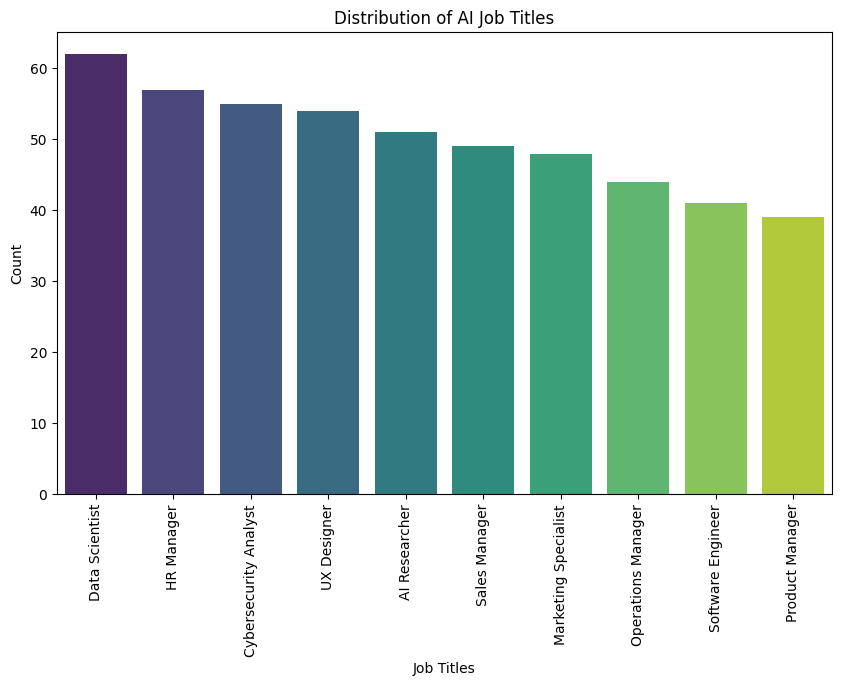

In [11]:
# Count the occurrences of each job title
job_title_counts = df["Job_Title"].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=job_title_counts.index, y=job_title_counts.values, palette="viridis")
plt.xlabel("Job Titles")
plt.ylabel("Count")
plt.title("Distribution of AI Job Titles")
plt.xticks(rotation=90)  
plt.show()

C:\Users\sures\AppData\Local\Temp\ipykernel_11292\2676483867.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Industry_counts.index, y=Industry_counts.values, palette="coolwarm")


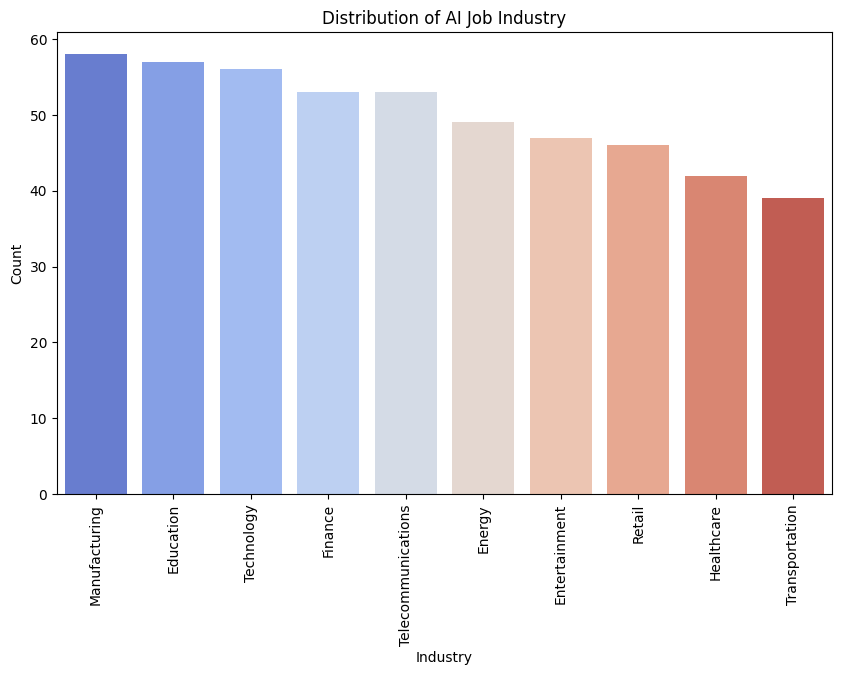

In [12]:
Industry_counts = df["Industry"].value_counts()
# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=Industry_counts.index, y=Industry_counts.values, palette="coolwarm")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.title("Distribution of AI Job Industry")
plt.xticks(rotation=90)  
plt.show()

<Axes: xlabel='count', ylabel='Company_Size'>

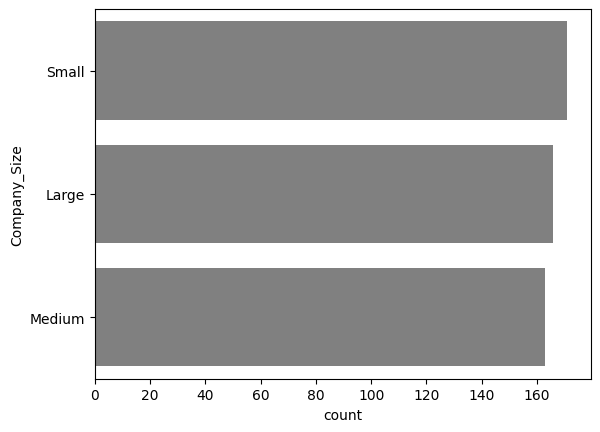

In [13]:
sns.countplot(df["Company_Size"],color='gray')

C:\Users\sures\AppData\Local\Temp\ipykernel_11292\289017898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")


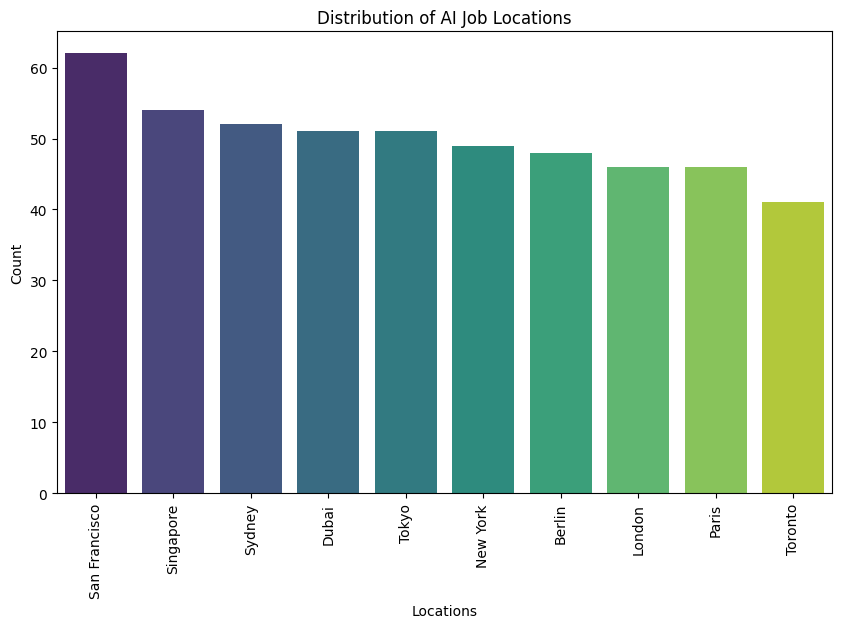

In [14]:
location_counts = df["Location"].value_counts()
# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")
plt.xlabel("Locations")
plt.ylabel("Count")
plt.title("Distribution of AI Job Locations")
plt.xticks(rotation=90)  
plt.show()

<Axes: xlabel='count', ylabel='AI_Adoption_Level'>

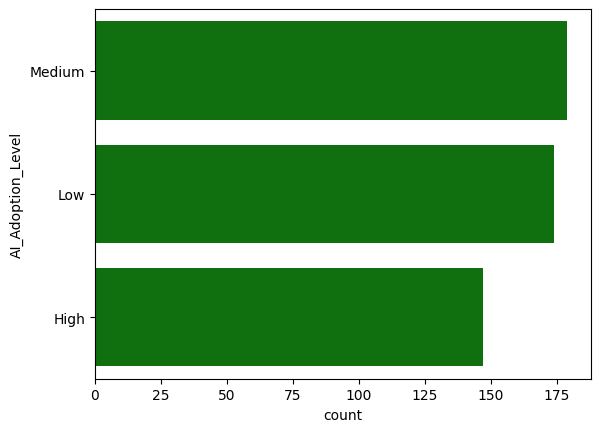

In [15]:
sns.countplot(df["AI_Adoption_Level"],color="green")

<Axes: xlabel='count', ylabel='Automation_Risk'>

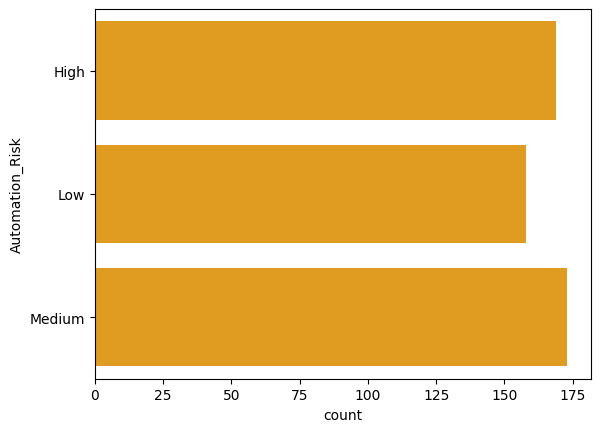

In [16]:
sns.countplot(df["Automation_Risk"],color='orange')

C:\Users\sures\AppData\Local\Temp\ipykernel_11292\892449424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_counts.index, y=skill_counts.values, palette="viridis")


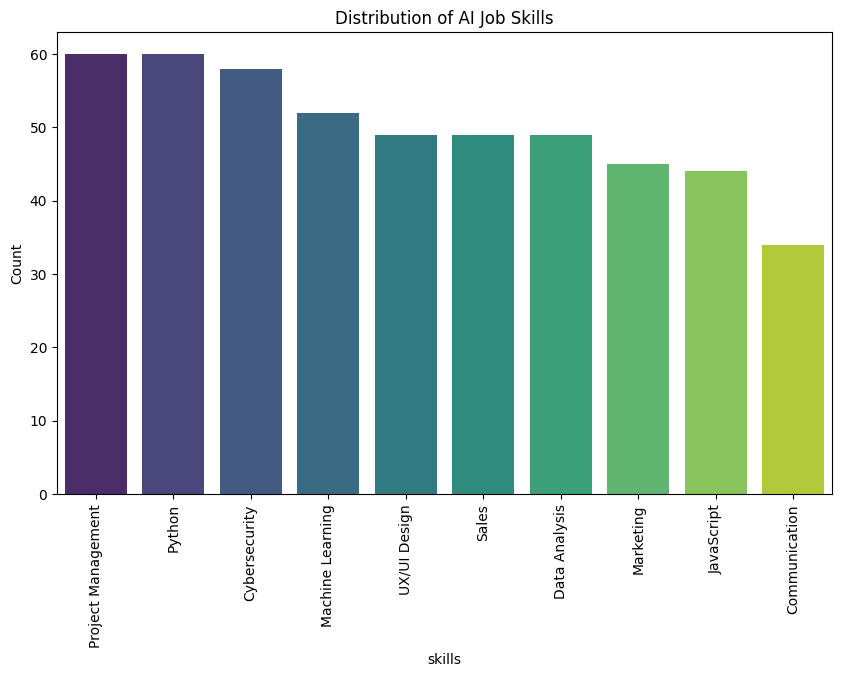

In [17]:
#skills
skill_counts = df["Required_Skills"].value_counts()
# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=skill_counts.index, y=skill_counts.values, palette="viridis")
plt.xlabel("skills")
plt.ylabel("Count")
plt.title("Distribution of AI Job Skills")
plt.xticks(rotation=90)  
plt.show()

<Axes: xlabel='Salary_USD', ylabel='Count'>

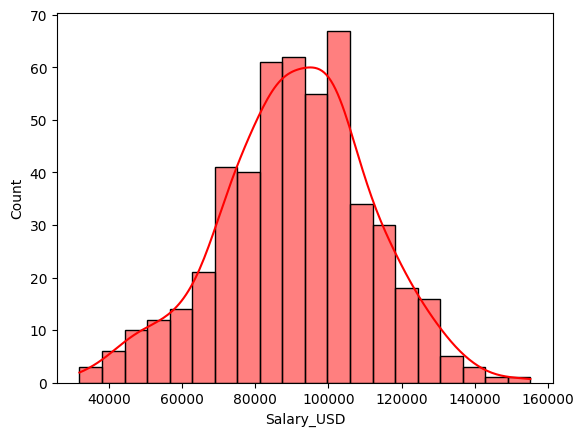

In [18]:
sns.histplot(df["Salary_USD"],color='red',kde=True)

<Axes: xlabel='count', ylabel='Remote_Friendly'>

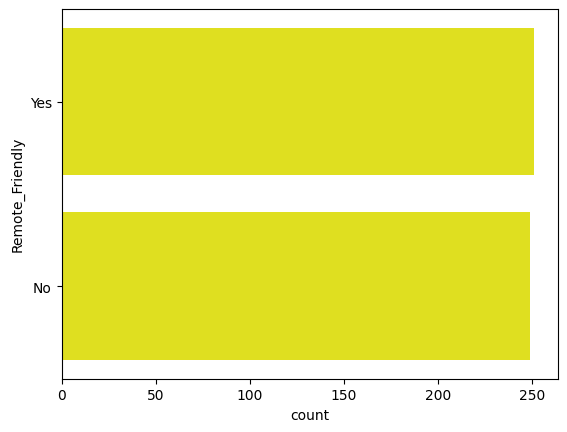

In [19]:
sns.countplot(df["Remote_Friendly"],color='yellow')

<Axes: xlabel='count', ylabel='Job_Growth_Projection'>

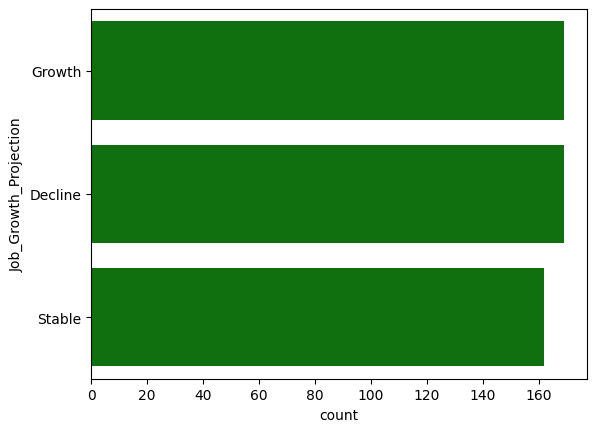

In [20]:
sns.countplot(df["Job_Growth_Projection"],color='green')

C:\Users\sures\AppData\Local\Temp\ipykernel_11292\2468948993.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df["Salary_USD"], palette="coolwarm")


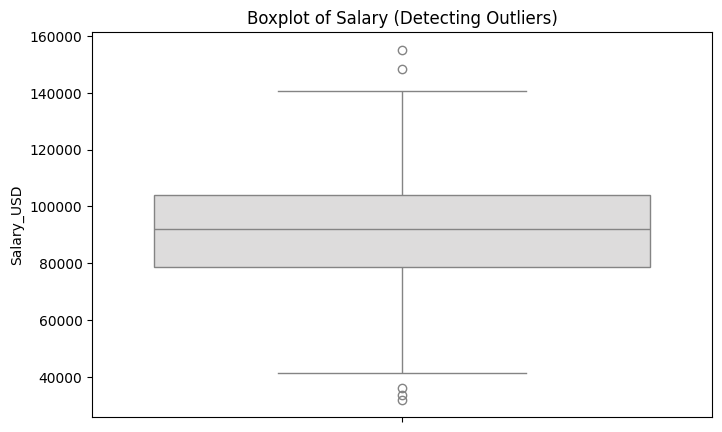

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Salary_USD"], palette="coolwarm")
plt.title("Boxplot of Salary (Detecting Outliers)")
plt.show()

In [22]:
from scipy import stats

In [23]:
df["Salary_Score"] = stats.zscore(df["Salary_USD"])
df_cleaned = df[(df["Salary_Score"]>-3) & (df["Salary_Score"]<3)]

print(df.shape)
print(df_cleaned.shape)

(500, 11)
(499, 11)


In [24]:
print(df.shape)
print(df_cleaned.shape)

(500, 11)
(499, 11)


In [25]:
df_cleaned.drop(columns='Salary_Score')

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.16520,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56247,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.26310,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.95376,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.92217,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.39400,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.99210,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.93310,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.15063,Yes,Stable


Text(0, 0.5, 'Salary')

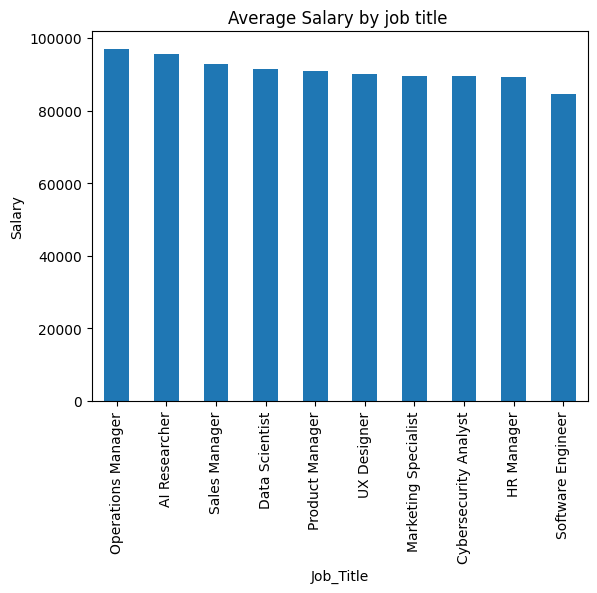

In [26]:
df_cleaned.groupby(["Job_Title"])["Salary_USD"].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Salary by job title ")
plt.ylabel("Salary")


Text(0, 0.5, 'Salary')

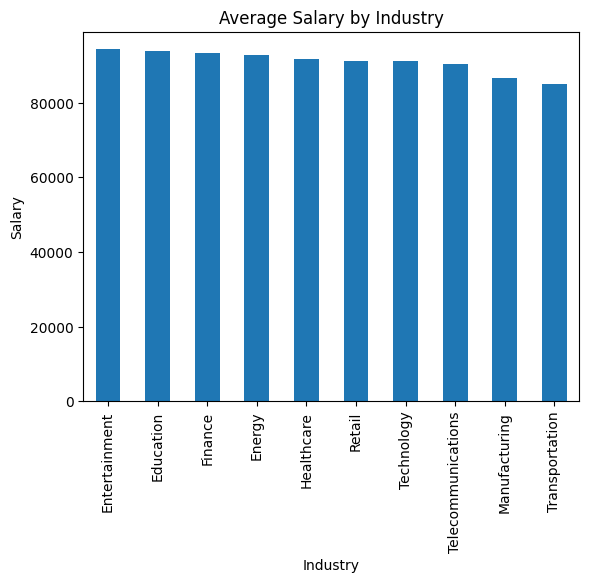

In [27]:
df_cleaned.groupby(["Industry"])["Salary_USD"].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Salary by Industry")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

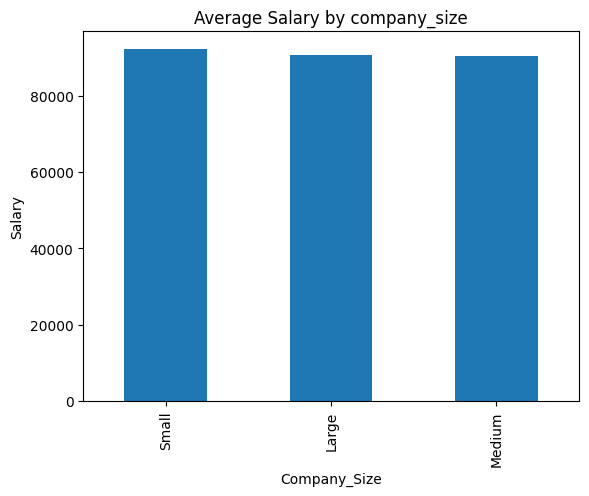

In [28]:
df_cleaned.groupby(["Company_Size"])["Salary_USD"].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Salary by company_size")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

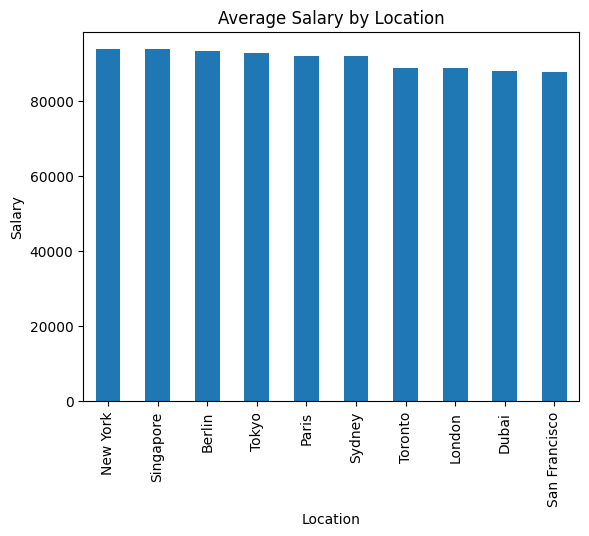

In [29]:
df_cleaned.groupby(["Location"])["Salary_USD"].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Salary by Location")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

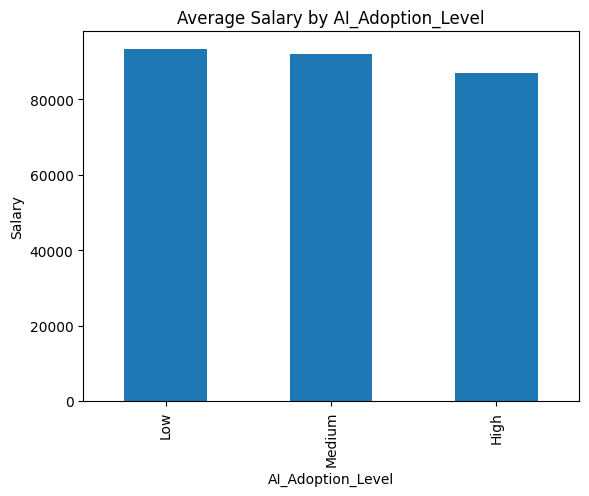

In [30]:
df_cleaned.groupby(["AI_Adoption_Level"])["Salary_USD"].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Salary by AI_Adoption_Level")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

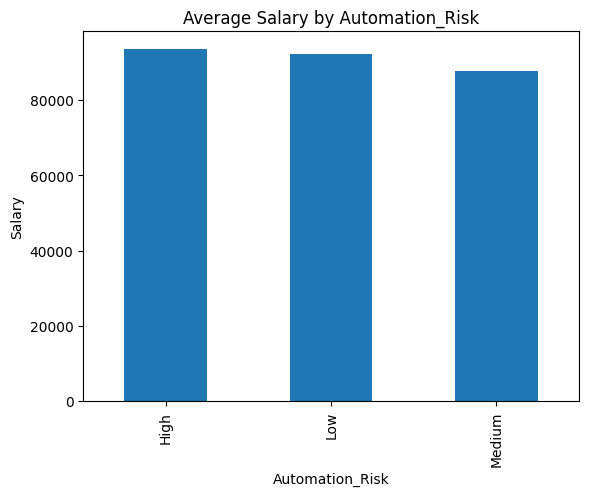

In [31]:
df_cleaned.groupby(["Automation_Risk"])["Salary_USD"].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Salary by Automation_Risk")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

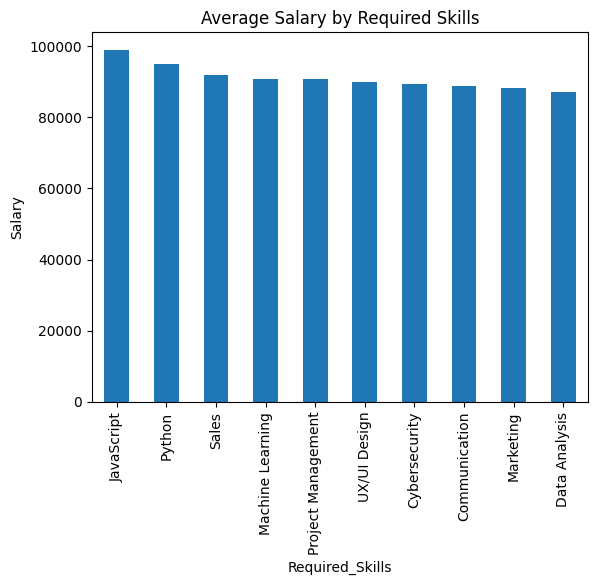

In [32]:
df_cleaned.groupby(["Required_Skills"])["Salary_USD"].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Salary by Required Skills")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

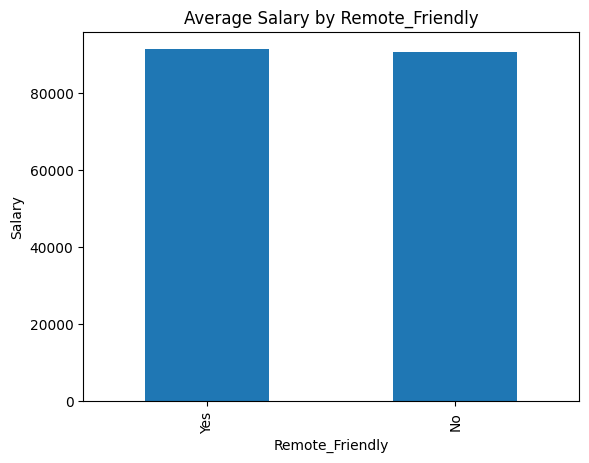

In [33]:
df_cleaned.groupby(["Remote_Friendly"])["Salary_USD"].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Salary by Remote_Friendly")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

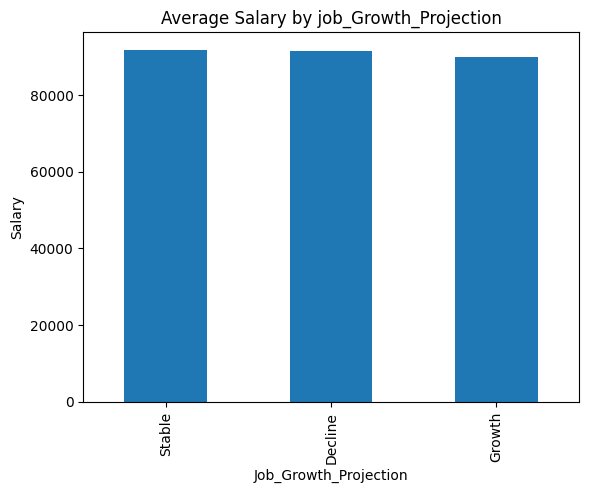

In [34]:
df_cleaned.groupby(["Job_Growth_Projection"])["Salary_USD"].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Salary by job_Growth_Projection")
plt.ylabel("Salary")

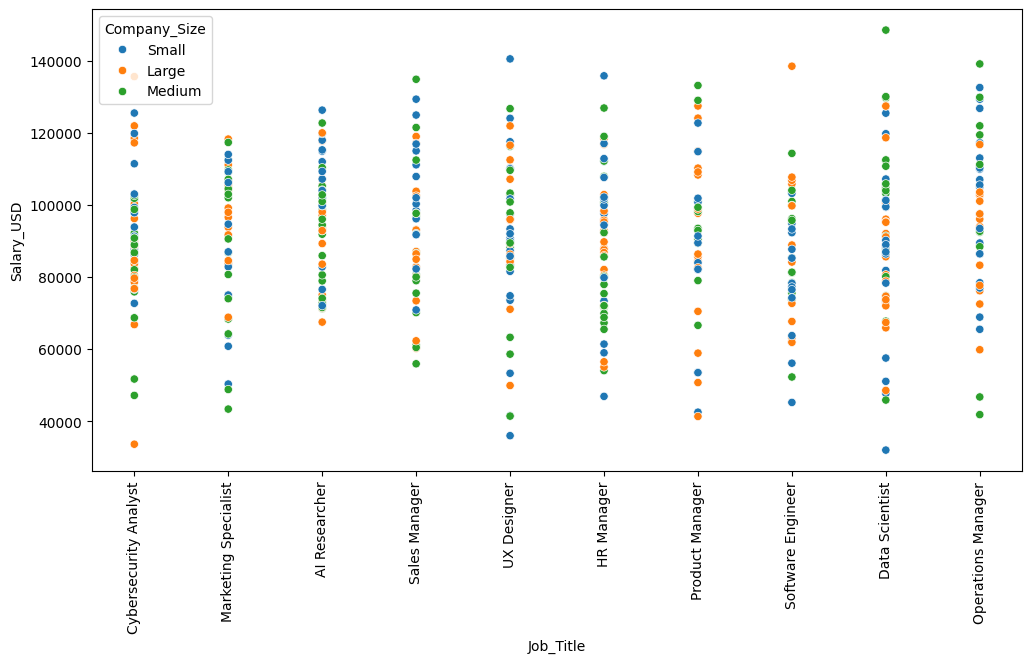

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_cleaned,x='Job_Title',y='Salary_USD',hue='Company_Size')
plt.xticks(rotation=90)
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler



In [37]:
scale = StandardScaler()
df_cleaned.loc[:,"Salary_USD"] = scale.fit_transform(df_cleaned[["Salary_USD"]])
df_cleaned

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection,Salary_Score
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,0.999763,Yes,Growth,0.984671
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,0.132908,No,Decline,0.125474
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,0.791816,Yes,Growth,0.778561
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,0.095248,No,Growth,0.088146
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,-0.164570,Yes,Decline,-0.169376
...,...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,0.725379,Yes,Stable,0.712711
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,1.413638,No,Decline,1.394889
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,-0.563923,Yes,Stable,-0.565201
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,-0.662569,Yes,Stable,-0.662975


In [38]:
for col in ["Industry", "Job_Title", "Location", "Required_Skills"]:
    df_cleaned.loc[:,col + "_Freq"] = df_cleaned[col].map(df_cleaned[col].value_counts(normalize=True))
df_cleaned.drop(columns=["Job_Title","Industry","Location","Required_Skills","Salary_Score"],axis=1,inplace=True)


C:\Users\sures\AppData\Local\Temp\ipykernel_11292\3756428278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:,col + "_Freq"] = df_cleaned[col].map(df_cleaned[col].value_counts(normalize=True))
C:\Users\sures\AppData\Local\Temp\ipykernel_11292\3756428278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:,col + "_Freq"] = df_cleaned[col].map(df_cleaned[col].value_counts(normalize=True))
C:\Users\sures\AppData\Local\Temp\ipykernel_11292\3756428278.py:2: SettingWithCopyWarn

In [39]:
ordinal_mapping = {"Low": 0, "Medium": 1, "High": 2}
ordinal_mapping_2 = {"Small": 0, "Medium": 1, "Large": 2}

df_cleaned.loc[:,"AI_Adoption_Level"] = df_cleaned["AI_Adoption_Level"].map(ordinal_mapping)
df_cleaned.loc[:,"Automation_Risk"] = df_cleaned["Automation_Risk"].map(ordinal_mapping)
df_cleaned.loc[:,"Company_Size"] = df_cleaned["Company_Size"].map(ordinal_mapping_2)
df_cleaned[["Company_Size","AI_Adoption_Level","Automation_Risk"]].astype("int64")
df_cleaned

,Company_Size,AI_Adoption_Level,Automation_Risk,Salary_USD,Remote_Friendly,Job_Growth_Projection,Industry_Freq,Job_Title_Freq,Location_Freq,Required_Skills_Freq
0,0,1,2,0.999763,Yes,Growth,0.094188,0.110220,0.102204,0.098196
1,2,1,2,0.132908,No,Decline,0.112224,0.094188,0.108216,0.090180
2,2,1,2,0.791816,Yes,Growth,0.112224,0.102204,0.108216,0.098196
3,0,0,2,0.095248,No,Growth,0.092184,0.098196,0.096192,0.120240
4,0,0,0,-0.164570,Yes,Decline,0.094188,0.110220,0.102204,0.088176
...,...,...,...,...,...,...,...,...,...,...
495,1,0,1,0.725379,Yes,Stable,0.106212,0.124248,0.096192,0.104208
496,0,0,2,1.413638,No,Decline,0.106212,0.110220,0.092184,0.098196
497,2,2,0,-0.563923,Yes,Stable,0.098196,0.110220,0.102204,0.098196
498,2,2,0,-0.662569,Yes,Stable,0.084168,0.088176,0.092184,0.120240


In [40]:
x = df_cleaned[['Job_Title_Freq','Industry_Freq','Company_Size','Location_Freq','AI_Adoption_Level', 'Automation_Risk', 'Required_Skills_Freq']]
y = df_cleaned["Salary_USD"]

In [41]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company_Size           499 non-null    object 
 1   AI_Adoption_Level      499 non-null    object 
 2   Automation_Risk        499 non-null    object 
 3   Salary_USD             499 non-null    float64
 4   Remote_Friendly        499 non-null    object 
 5   Job_Growth_Projection  499 non-null    object 
 6   Industry_Freq          499 non-null    float64
 7   Job_Title_Freq         499 non-null    float64
 8   Location_Freq          499 non-null    float64
 9   Required_Skills_Freq   499 non-null    float64
dtypes: float64(5), object(5)
memory usage: 42.9+ KB


In [42]:

from sklearn.model_selection import train_test_split
train_test_split(x,y)

[     Job_Title_Freq  Industry_Freq Company_Size  Location_Freq  \
 297        0.078156       0.106212            0       0.092184   
 222        0.088176       0.112224            0       0.122244   
 475        0.102204       0.098196            0       0.122244   
 272        0.102204       0.112224            1       0.122244   
 236        0.110220       0.114228            0       0.082164   
 ..              ...            ...          ...            ...   
 166        0.108216       0.116232            0       0.102204   
 287        0.098196       0.104208            0       0.092184   
 140        0.108216       0.112224            0       0.098196   
 326        0.124248       0.084168            2       0.096192   
 235        0.098196       0.078156            1       0.104208   
 
     AI_Adoption_Level Automation_Risk  Required_Skills_Freq  
 297                 1               0              0.120240  
 222                 2               1              0.090180  
 475 

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"📊 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")


📊 Model Performance:
🔹 Mean Absolute Error (MAE): 0.82
🔹 Mean Squared Error (MSE): 1.12
🔹 Root Mean Squared Error (RMSE): 1.06


In [45]:
#degree = 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np


poly = PolynomialFeatures(degree=2)  # Try 3 or 4 for more complexity
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test) 


model = LinearRegression()
model.fit(x_train_poly, y_train)

# Predictions
y_pred = model.predict(x_test_poly)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 R_Squared: {r2:.2f}")


📊 Model Performance:
🔹 Mean Absolute Error (MAE): 0.83
🔹 Mean Squared Error (MSE): 1.12
🔹 Root Mean Squared Error (RMSE): 1.06
🔹 R_Squared: 0.00


In [ ]:
#degree = 3
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


poly = PolynomialFeatures(degree=3)  # Try 3 or 4 for more complexity
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test) 


model = LinearRegression()
model.fit(x_train_poly, y_train)

# Predictions
y_pred = model.predict(x_test_poly)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 R_Squared: {r2:.2f}")


📊 Model Performance:
🔹 Mean Absolute Error (MAE): 1.02
🔹 Mean Squared Error (MSE): 1.75
🔹 Root Mean Squared Error (RMSE): 1.32


In [ ]:
#Ridge Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


poly = PolynomialFeatures(degree=2)  # Try 3 or 4 for more complexity
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test) 


model = Ridge(alpha=1)
model.fit(x_train_poly, y_train)

# Predictions
y_pred = model.predict(x_test_poly)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 R_Squared: {r2:.2f}")


📊 Model Performance:
🔹 Mean Absolute Error (MAE): 0.80
🔹 Mean Squared Error (MSE): 1.10
🔹 Root Mean Squared Error (RMSE): 1.05


In [48]:
#Lasso Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


poly = PolynomialFeatures(degree=2)  # Try 3 or 4 for more complexity
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test) 


model = Lasso(alpha=1)
model.fit(x_train_poly, y_train)

# Predictions
y_pred = model.predict(x_test_poly)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"📊 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")


📊 Model Performance:
🔹 Mean Absolute Error (MAE): 0.83
🔹 Mean Squared Error (MSE): 1.13
🔹 Root Mean Squared Error (RMSE): 1.06


In [49]:
#ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test) 


model = ElasticNet(alpha=1,l1_ratio = 0.5)
model.fit(x_train_poly, y_train)

# Predictions
y_pred = model.predict(x_test_poly)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"📊 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")


📊 Model Performance:
🔹 Mean Absolute Error (MAE): 0.83
🔹 Mean Squared Error (MSE): 1.13
🔹 Root Mean Squared Error (RMSE): 1.06


In [50]:
#DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


model =  DecisionTreeRegressor(max_depth=3)
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"📊 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")

📊 Model Performance:
🔹 Mean Absolute Error (MAE): 0.82
🔹 Mean Squared Error (MSE): 1.14
🔹 Root Mean Squared Error (RMSE): 1.07


In [51]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 8))
plot_tree(model, filled=True, rounded=True)
plt.show()

KeyboardInterrupt: 

In [ ]:
#Bagging to improve stability and accuracy by training multiple models on random subsets of data
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test) 


model = BaggingRegressor(n_estimators=100)
model.fit(x_train_poly, y_train)

# Predictions
y_pred = model.predict(x_test_poly)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"📊 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")

📊 Model Performance:
🔹 Mean Absolute Error (MAE): 0.87
🔹 Mean Squared Error (MSE): 1.23
🔹 Root Mean Squared Error (RMSE): 1.11


In [ ]:
#RandomForest Regressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np



x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test) 


model =  RandomForestRegressor(n_estimators=50,max_depth=3,random_state=42)
model.fit(x_train_poly, y_train)

# Predictions
y_pred = model.predict(x_test_poly)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"📊 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")

📊 Model Performance:
🔹 Mean Absolute Error (MAE): 0.83
🔹 Mean Squared Error (MSE): 1.13
🔹 Root Mean Squared Error (RMSE): 1.06


In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


poly = PolynomialFeatures(degree=2)  # Try 3 or 4 for more complexity
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test) 

model = GradientBoostingRegressor(n_estimators=50,max_depth=3,random_state=42)
model.fit(x_train_poly, y_train)

# Predictions
y_pred = model.predict(x_test_poly)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"📊 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")

📊 Model Performance:
🔹 Mean Absolute Error (MAE): 0.87
🔹 Mean Squared Error (MSE): 1.22
🔹 Root Mean Squared Error (RMSE): 1.11


In [ ]:
#Extreme Boost
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


poly = PolynomialFeatures(degree=2)  # Try 3 or 4 for more complexity
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test) 


model = XGBRegressor(n_estimators=50,max_depth=3,random_state=42)
model.fit(x_train_poly, y_train)

# Predictions
y_pred = model.predict(x_test_poly)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"📊 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")


📊 Model Performance:
🔹 Mean Absolute Error (MAE): 0.89
🔹 Mean Squared Error (MSE): 1.26
🔹 Root Mean Squared Error (RMSE): 1.12


In [ ]:
#K-Nearest Neighbors (KNN) Regression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


poly = PolynomialFeatures(degree=2)  # Try 3 or 4 for more complexity
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test) 


model =KNeighborsRegressor()
model.fit(x_train_poly, y_train)

# Predictions
y_pred = model.predict(x_test_poly)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"📊 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")


📊 Model Performance:
🔹 Mean Absolute Error (MAE): 0.84
🔹 Mean Squared Error (MSE): 1.18
🔹 Root Mean Squared Error (RMSE): 1.09


In [ ]:
#support vector Regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


poly = PolynomialFeatures(degree=2)  # Try 3 or 4 for more complexity
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test) 


model = SVR()
model.fit(x_train_poly, y_train)

# Predictions
y_pred = model.predict(x_test_poly)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"📊 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")


📊 Model Performance:
🔹 Mean Absolute Error (MAE): 0.82
🔹 Mean Squared Error (MSE): 1.13
🔹 Root Mean Squared Error (RMSE): 1.06
